    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


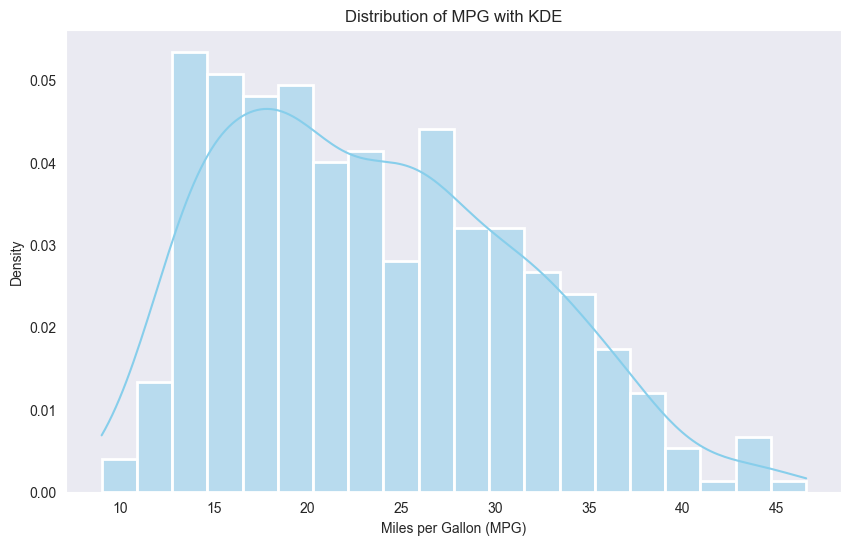

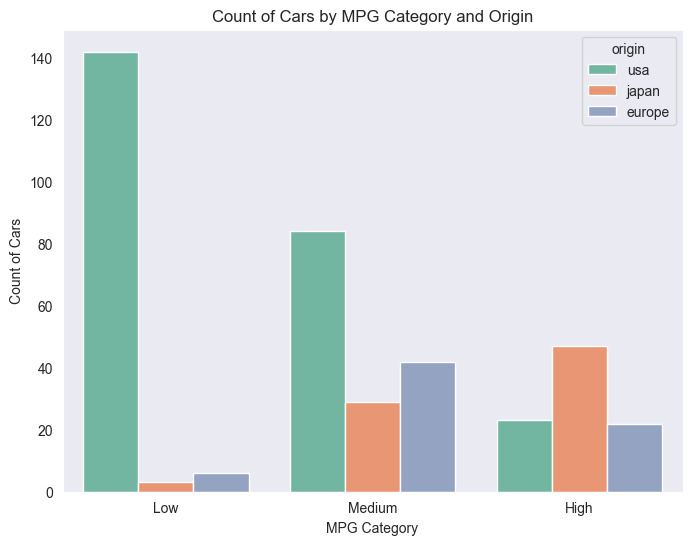

In [4]:
# Seaborn의 mpg(Miles Per Gallon) 데이터셋을 활용하여
# 진행할 수 있는 간단한
#
# 예제 1: 자동차 연비(mpg)의 분포 및 구간별 시각화
#
# 문제 설명
# mpg 데이터셋을 불러옵니다.
# 자동차 연비(mpg)의 전반적인 분포를 히스토그램으로 시각화하고,
# 커널 밀도 곡선(KDE)을 함께 그려보세요.
# 연비를 범주화(예: ‘저연비’, ‘중연비’, ‘고연비’)해서 막대 그래프로 시각화해보고,
# 각 범주에 속하는 자동차가 몇 대인지 확인하세요.
#
# # 1. mpg 데이터셋 불러오기
# mpg = sns.load_dataset("mpg")
# print(mpg.head())
#
#
# # 3. 연비 범주화 (예시 기준: 0~20=저연비, 20~30=중연비, 30이상=고연비)
# def categorize_mpg(x):
# if x < 20:
# return "Low"
# elif x < 30:
# return "Medium"
# else:
# return "High"

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.font_manager as fm

# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

sns.set_style("dark")

# mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")
print(mpg.head())  # 필요하면 첫 몇 개 데이터 확인

# 연비 범주화
def categorize_mpg(x):
    if x < 20:
        return "Low"  # 저연비
    elif x < 30:
        return "Medium"  # 중연비
    else:
        return "High"  # 고연비

# 연비 컬럼을 기준으로 'Low', 'Medium', 'High' 범주 생성
mpg['mpg_category'] = mpg['mpg'].apply(categorize_mpg)

# 연비 분포를 히스토그램과 커널 밀도 곡선(KDE)으로 시각화
plt.figure(figsize=(10, 6))
sns.histplot(mpg['mpg'], kde=True, bins=20, color='skyblue', stat='density', linewidth=2)
plt.title("Distribution of MPG with KDE")
plt.xlabel("Miles per Gallon (MPG)")
plt.ylabel("Density")
plt.show()

# 연비 범주별 자동차 수를 막대 그래프로 시각화
# 예시: 'origin' 컬럼을 기준으로 색상 구분 (여기서 'origin'은 데이터셋에 존재하는 컬럼)
plt.figure(figsize=(8, 6))
sns.countplot(x='mpg_category', data=mpg, hue='origin', palette='Set2')
plt.title("Count of Cars by MPG Category and Origin")
plt.xlabel("MPG Category")
plt.ylabel("Count of Cars")
plt.show()


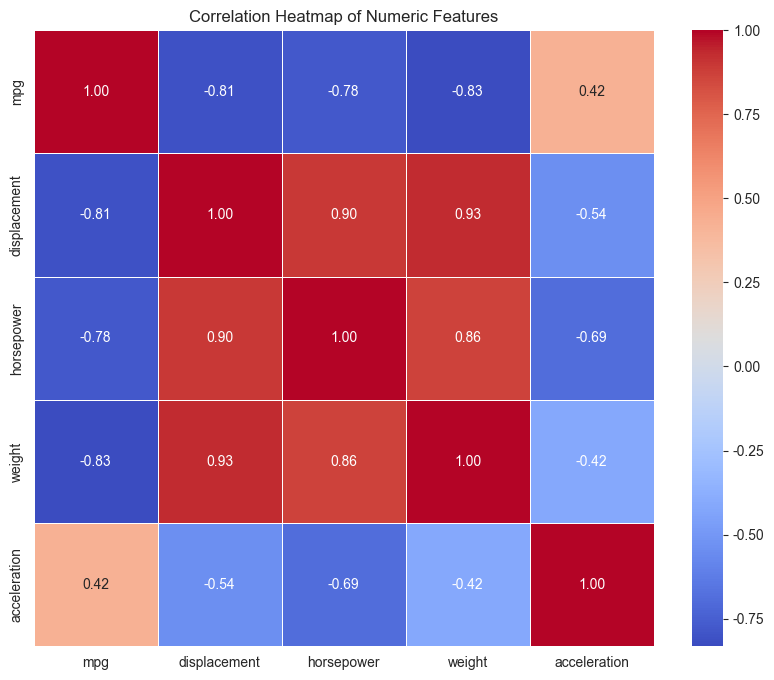

In [2]:
# 예제 2: 숫자형 변수 간 상관관계 분석 (Heatmap)
#
# 문제 설명
# mpg 데이터셋에서 숫자형 열
# (예: mpg, displacement, horsepower, weight, acceleration)만
# 골라서 새로운 데이터프레임을 생성합니다.
# (결측치 제거 : dropna())
#
# 이들 변수 간 상관계수를 구한 뒤, Seaborn의 heatmap으로 시각화해보세요.
# 상관계수를 해석하고, 어떤 변수들이 연비(mpg)와 밀접한 관계가 있는지 논의해보세요.

# mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")

# 숫자형 변수만 선택
numeric_mpg = mpg[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]

# 결측지 제거
numeric_mpg = numeric_mpg.dropna()

# 상관계수 계산
corr_matrix = numeric_mpg.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 그래프 제목 설정
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):          3.06e-104
Time:                        17:22:25   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

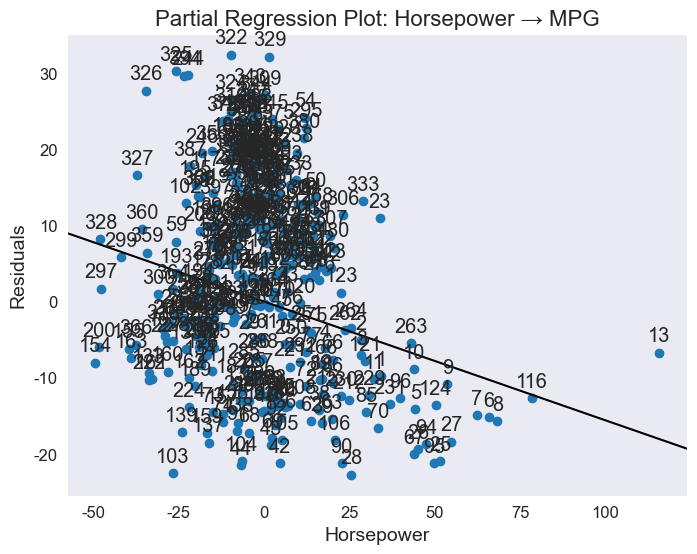

In [5]:
# 예제 3: 회귀 모델 적합 및 부분 회귀 플롯(Partial Regression Plot)
# 문제 설명
# 종속 변수를 mpg로 설정하고, 독립 변수로 horsepower, weight를 사용하여
# 선형 회귀 모델을 적합합니다.
# (결측치 제거 : dropna())
# 모델 요약 결과를 확인하고, horsepower가 연비에 미치는 순수한 영향을
# 부분 회귀 플롯으로 시각화하세요.

# 1. mpg 데이터셋 불러오기
mpg = sns.load_dataset("mpg")

# 2. 결측치 제거
mpg = mpg.dropna(subset=['mpg', 'horsepower', 'weight'])

# 3. 독립 변수(X)와 종속 변수(y) 설정
X = mpg[['horsepower', 'weight']]  # 독립 변수
y = mpg['mpg']  # 종속 변수

# 4. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 5. OLS 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 6. 회귀 분석 결과 출력
print(model.summary())

# 7. 부분 회귀 플롯 (horsepower의 순수한 영향력 확인)
fig, ax = plt.subplots(figsize=(8, 6))

# 'horsepower'에 대한 부분 회귀 플롯
sm.graphics.plot_partregress(endog=y, exog_i=X['horsepower'], exog_others=X[['weight']], data=mpg, ax=ax)

# 8. 그래프 제목 설정
plt.title("Partial Regression Plot: Horsepower → MPG", fontsize=16)
plt.xlabel("Horsepower", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 9. 그래프 표시
plt.show()